In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp # as suggested by Nikhil
import warnings; warnings.filterwarnings('ignore')
from scipy.interpolate import UnivariateSpline
plt.rc('axes', lw =2); plt.rc('font',family = 'serif'); plt.rc('text', usetex = True)

In [116]:
global OmegaM0
OmegaM0 = 0.3175

global OmegaDE0
OmegaDE0 = 1- 0.3175

In [117]:
def Omega_DE(a):
    numerator = OmegaDE0
    denominator = (OmegaM0*a**(-3) + OmegaDE0)
    return numerator/denominator

In [118]:
def diffEq(ln_a, sols):
    a = np.exp(ln_a)
    g, gdot = sols
    gddot = -(2.5 + 1.5 * Omega_DE(a)) * gdot - (3 * Omega_DE(a) * g) 
    return [gdot, gddot]

In [119]:
ln_a_vals = np.linspace(-5,5,5000)
a_vals = np.exp(ln_a_vals)
z_vals = 1/a_vals - 1

In [120]:
res = solve_ivp(fun = diffEq, t_span = [-5,5], y0 = [1,0], t_eval = ln_a_vals)

In [129]:
calc_g = res.y[0][np.where(np.abs(a_vals - 1) < 1e-3)]
print('g at a=1 is %.5f'%calc_g)

g at a=1 is 0.78968


In [122]:
normalized_D = a_vals*res.y[0]/calc_g

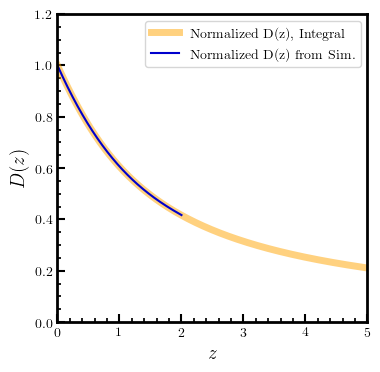

In [131]:
plt.figure(figsize = (4,4))

## normalize such that D(z = 0) = D(a = 1) = 1
plt.plot(1/np.exp(res.t)-1, normalized_D, color = 'orange', label = 'Normalized D(z), Integral',
         lw = 5, alpha = 0.5)

D_normalized = [1, 0.76872625, 0.60653086, 0.41693915] ## from other notebook
redshifts = [0,0.5,1,2]

spl = UnivariateSpline(redshifts, D_normalized)
test_z = np.linspace(0,2,200)

plt.plot(test_z, spl(test_z), color = 'mediumblue', label = 'Normalized D(z) from Sim.')


# aesthetics
ax = plt.gca()
ax.minorticks_on()
ax.tick_params(which =  'major', direction = 'in', length = 6, width = 1.5)
ax.tick_params(which =  'minor', direction = 'in', length = 3, width = 1.25)
plt.xlim(0,5); plt.ylim(0,1.2); plt.xlabel('$z$', fontsize = 14); plt.ylabel('$D(z)$', fontsize = 14)
plt.legend(loc = 'upper right')
plt.savefig('CompareGrowthFunctions.pdf', bbox_inches = 'tight')